In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'/content/HR.csv')
data.head(), data.dtypes

(   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  left  promotion_last_5years department  \
 0                   3              0     1                      0      sales   
 1                   6              0     1                      0      sales   
 2                   4              0     1                      0      sales   
 3                   5              0     1                      0      sales   
 4                   3              0     1                      0      sales   
 
    salary  
 0     low 

In [5]:
# Расчет средней, мин, макс, стнд откл
data.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [10]:
# Расчет медианы только для числовых столбцов
median_values = data.select_dtypes(include=[np.number]).median()

# Расчет моды для всех столбцов
mode_values = data.mode().iloc[0]  # Взятие первой строки для получения одного значения моды на столбец

print("Median values for numeric columns:\n", median_values)
print("Mode values for all columns:\n", mode_values)

Median values for numeric columns:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
Mode values for all columns:
 satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object


In [11]:
# Ьерем только числовые значения
numerical_data = data.select_dtypes(include=[np.number])

# матрица
correlation_matrix = numerical_data.corr()

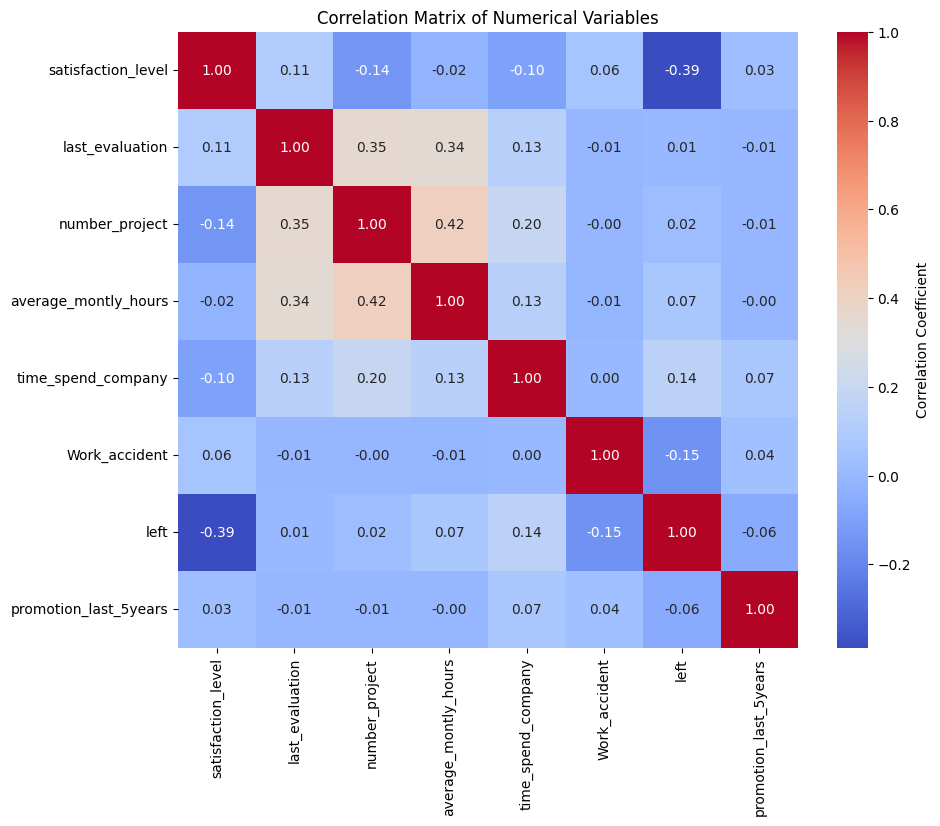

(number_project        average_montly_hours    0.417211
 average_montly_hours  number_project          0.417211
 dtype: float64,
 time_spend_company  Work_accident         0.00212
 Work_accident       time_spend_company    0.00212
 dtype: float64)

In [13]:
# Строим Матрицу
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Ищем пары корелляций
correlation_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # икслючаем диагональ

most_correlated = correlation_pairs.head(2)
least_correlated = correlation_pairs.tail(2)

most_correlated, least_correlated

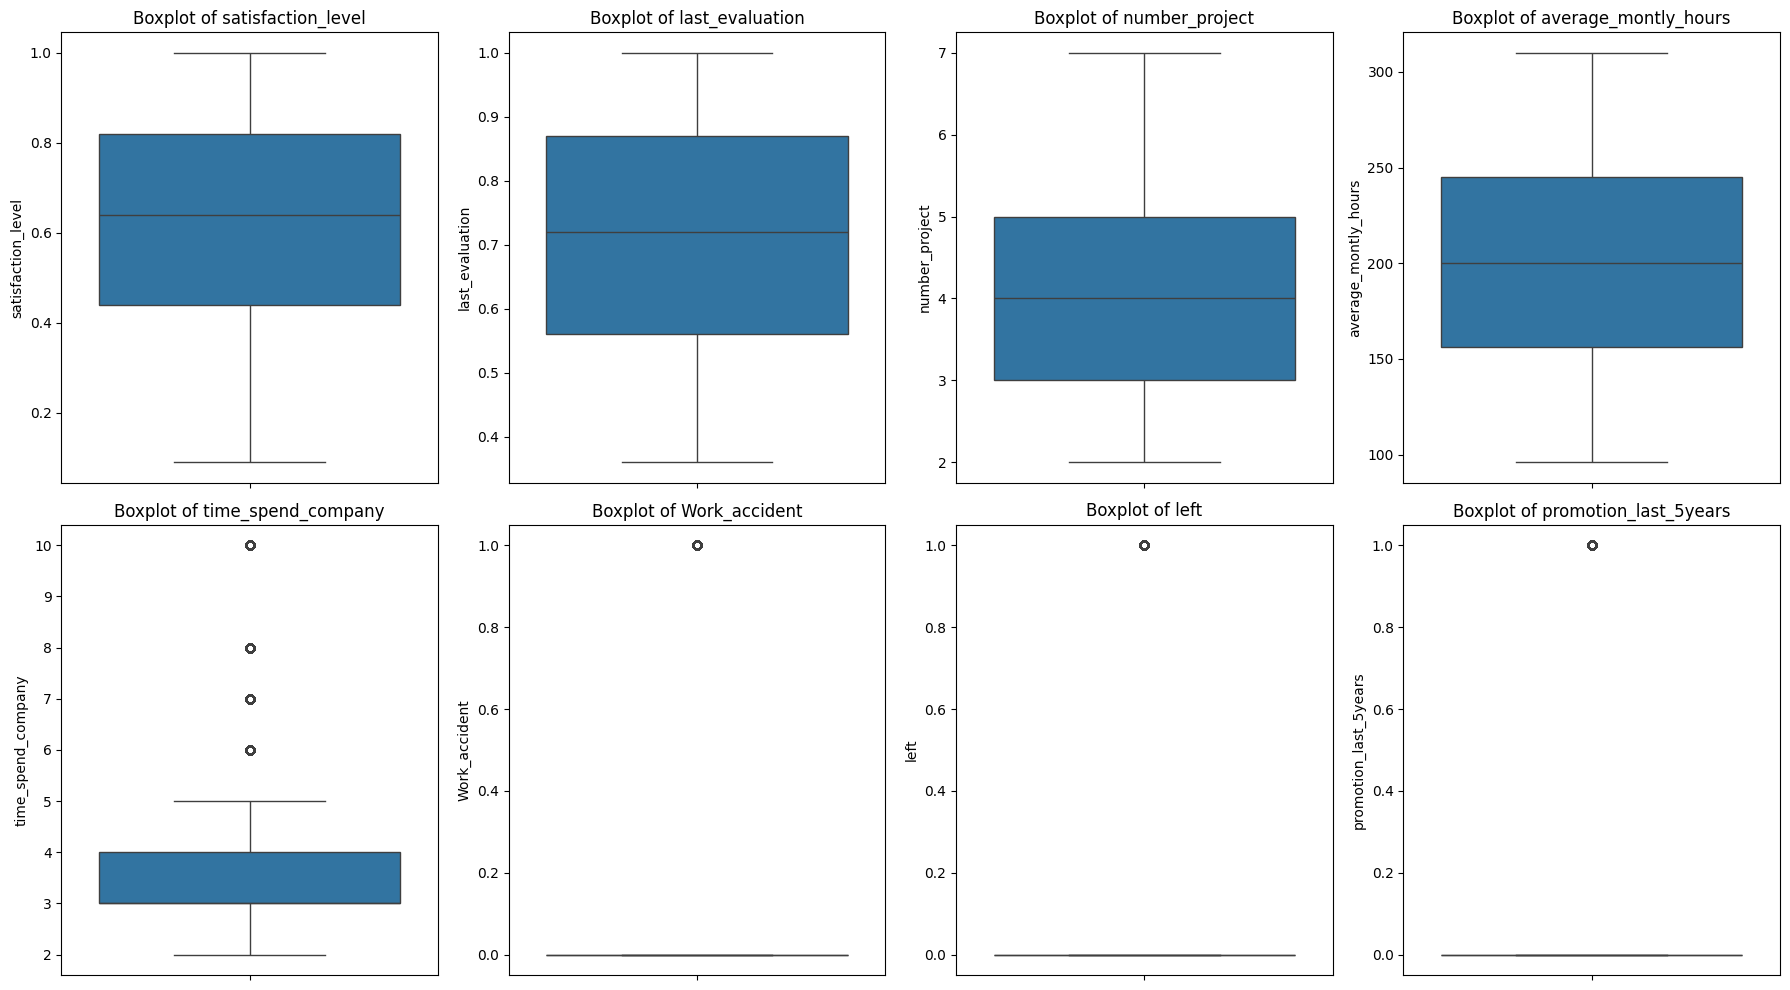

In [18]:
# Проверка данных на аномалии и выбросы

plt.figure(figsize=(18, 10))
for index, column in enumerate(numerical_data.columns):
    plt.subplot(2, 4, index + 1)
    sns.boxplot(y=numerical_data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

In [ ]:
# наиболее важные наблюдения по выбросам связаны с переменной time_spend_company,
# где высокие значения могут указывать на длительное пребывание сотрудников в компании,
# что может быть нехарактерно для большинства сотрудников

In [14]:
# Расчёт количества сотрудников в каждом департаменте
employees_per_department = data['department'].value_counts()
print(employees_per_department)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [15]:
# распределение сотрудников по зарплатам
salary_distribution = data['salary'].value_counts()
salary_distribution

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [16]:
# Расчёт распределения сотрудников по зарплатам в каждом департаменте
salary_distribution_by_department = data.groupby('department')['salary'].value_counts()

print(salary_distribution_by_department)

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   medium     225
             high       225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64


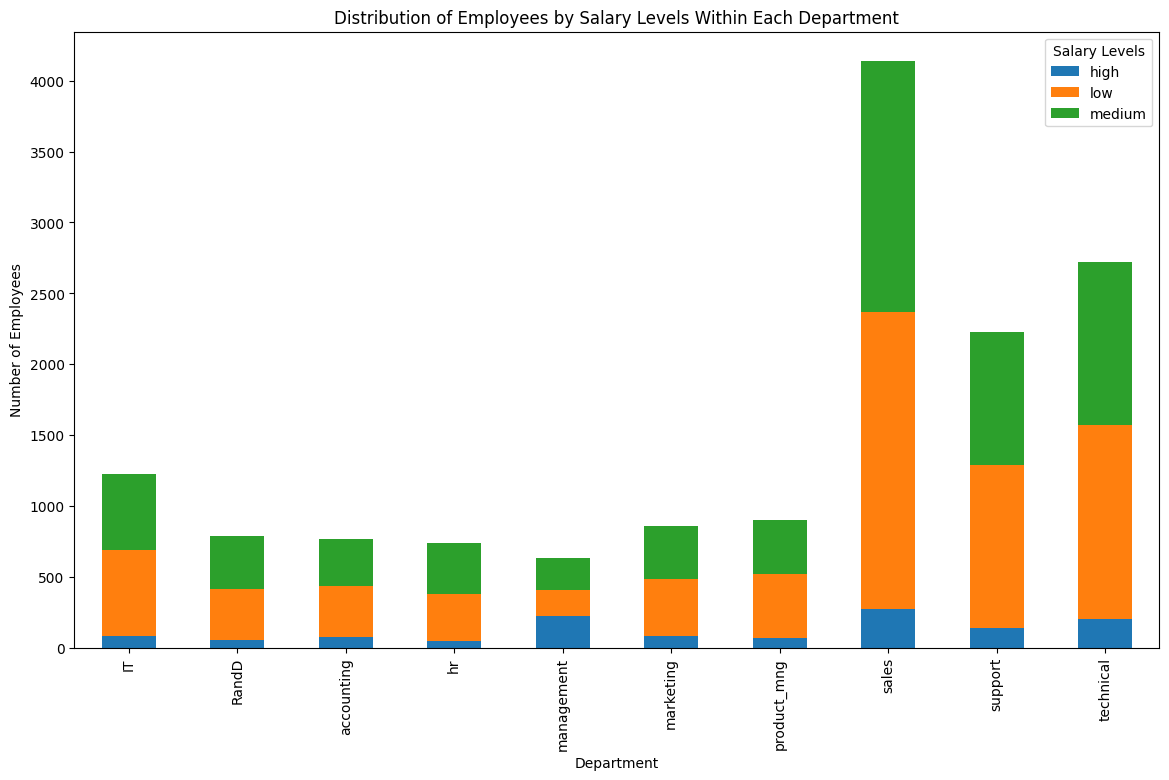

In [17]:
# Визуализация распределения
salary_distribution_by_department.unstack().plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Distribution of Employees by Salary Levels Within Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Salary Levels')
plt.show()

In [20]:
# Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким
# окладом
from scipy.stats import ttest_ind

high_salary_hours = data[data['salary'] == 'high']['average_montly_hours']
low_salary_hours = data[data['salary'] == 'low']['average_montly_hours']

# Performing an independent t-test
t_stat, p_value = ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)

t_stat.round(2), p_value.round(2)


(-0.76, 0.45)

In [ ]:
# Результаты t-теста для независимых выборок показывают, что статистически значимых различий в среднем количестве часов,
# проведенных на работе сотрудниками с высоким и низким окладами, нет:

In [25]:
#Расчет показателей среди уволившихся и не уволившихся сотрудников (по отдельности):
grouped_data = data.groupby('left')

# Расчеты
results = grouped_data.apply(lambda x: pd.Series({
    'Promotion Rate': x['promotion_last_5years'].mean().round(2),  # Доля сотрудников с повышением за последние 5 лет
    'Average Satisfaction': x['satisfaction_level'].mean().round(2),  # Средняя степень удовлетворенности
    'Average Number of Projects': x['number_project'].mean().round(2)  # Среднее количество проектов
}))

results


,Promotion Rate,Average Satisfaction,Average Number of Projects
left,,,
0,0.03,0.67,3.79
1,0.01,0.44,3.86


In [26]:
# Модель, предсказывающая уволился ли сотрудник на основе имеющихся факторов

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = data.drop(columns=['left', 'department', 'salary'])
target = data['left']

# разделение выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# LDA модель
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Делаем прогноз
y_pred = lda_model.predict(X_test)


In [30]:
# оценка точности
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

def format_results(accuracy, conf_matrix, class_report):
    print("Model Evaluation Results:\n")
    print(f"Accuracy: {accuracy:.2f}%\n")
    print("Confusion Matrix:")
    print(f"True Negatives (TN): {conf_matrix[0][0]}")
    print(f"False Positives (FP): {conf_matrix[0][1]}")
    print(f"False Negatives (FN): {conf_matrix[1][0]}")
    print(f"True Positives (TP): {conf_matrix[1][1]}\n")
    print("Classification Report:")
    print(class_report)
format_results(accuracy, conf_matrix, class_report)

Model Evaluation Results:

Accuracy: 0.76%

Confusion Matrix:
True Negatives (TN): 3138
False Positives (FP): 290
False Negatives (FN): 809
True Positives (TP): 263

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



In [ ]:
#  В целом модель справляется с различением между сотрудниками, которые уволились и теми, кто остался.
#  Модель эффективнее идентифицирует сотрудников, которые не уволились, но испытывает трудности с точным определением уволившихся,
#  что отражается в низких значениях precision и recall для класса 1
# Это может быть связано с несбалансированностью классов в данных, где уволенных сотрудников меньше, чем тех, кто остался